# Título

### 1 Importación de librerías

In [118]:
#tratamiento de datos
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix

#preprocesado de datos

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedShuffleSplit

from sklearn.pipeline import make_pipeline


# visualizacion

import seaborn as sns 
import matplotlib as plt



# modelos

import xgboost as xgb



### 2 Análisis exploratorio

In [119]:
df = pd.read_parquet('0000.parquet')

In [120]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [122]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [123]:
df.dropna(inplace=True)

In [124]:
df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], inplace=True, errors='ignore')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  bool   
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
 15  track_genre       113999 non-null  object 
dtypes: bool(1), float64(9), i

In [126]:
#celda de balanceo de track_genre

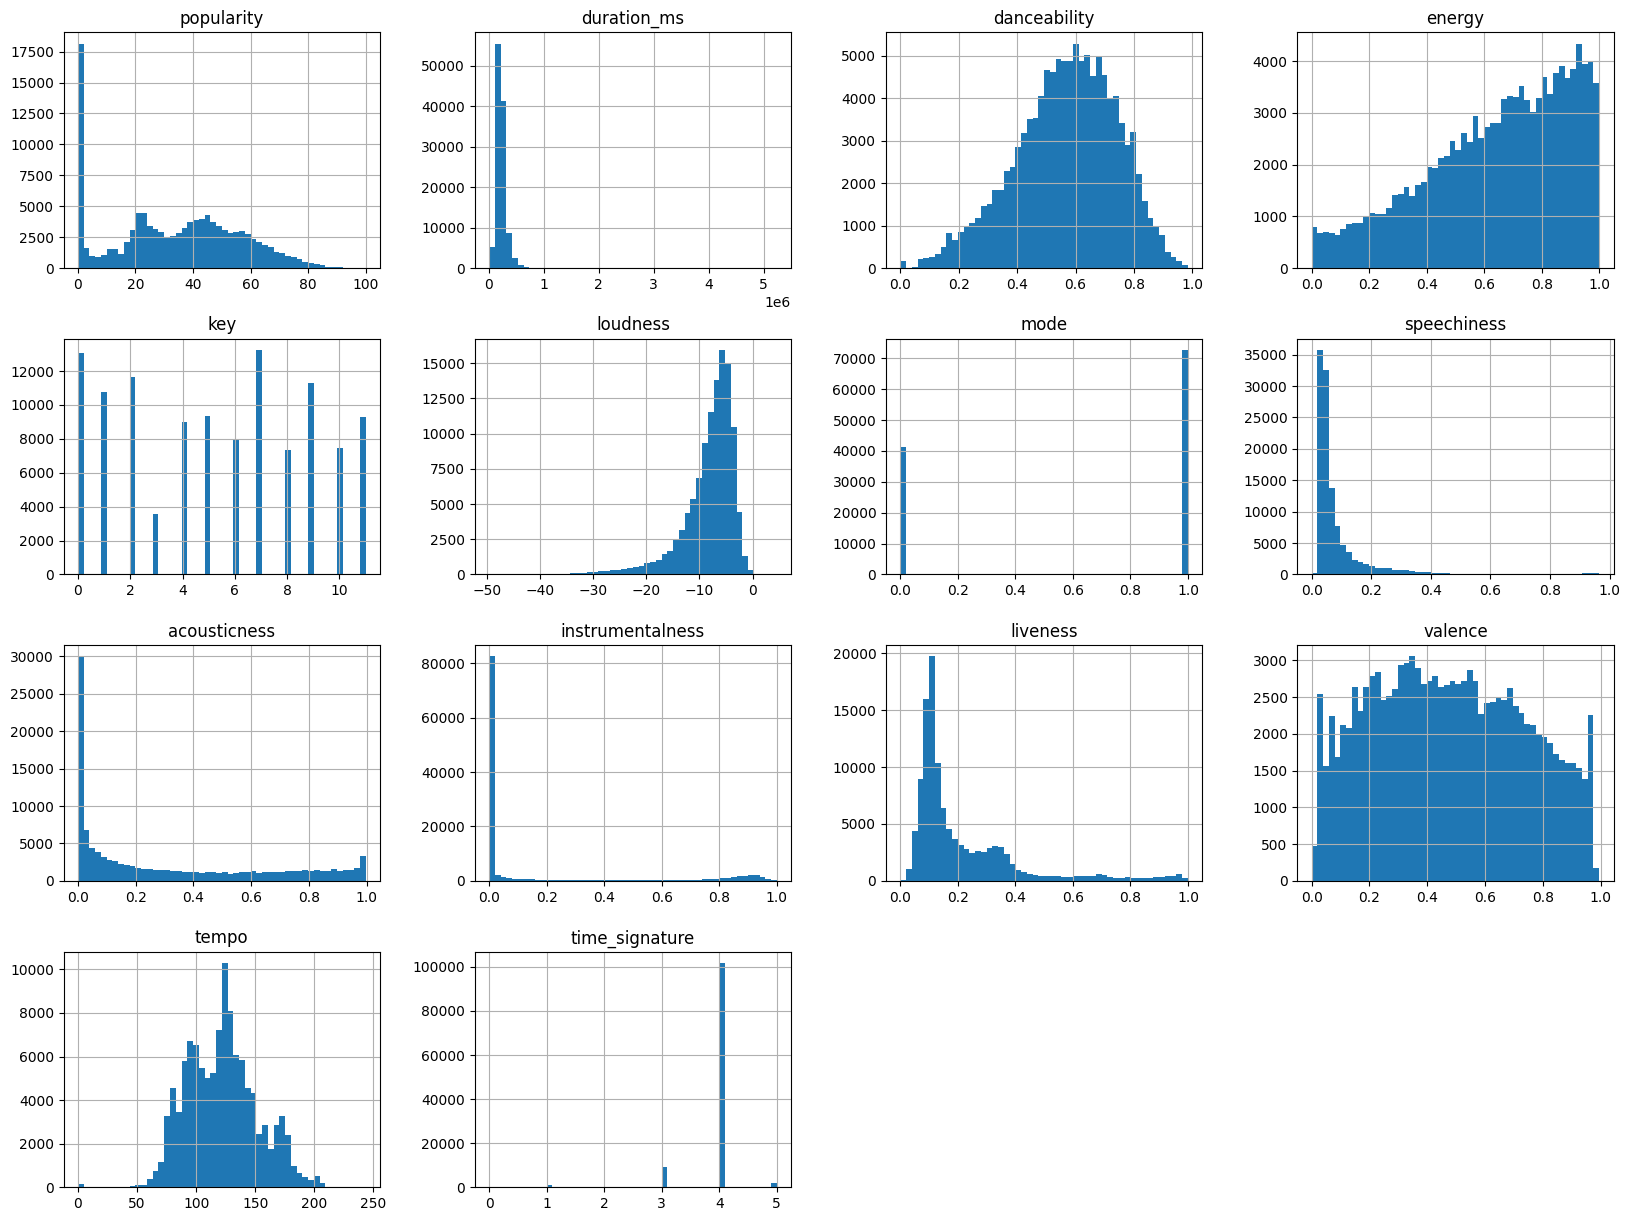

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [128]:
"""""sns.pairplot(df,
            hue='track_genre',
            height=4,
            vars=["popularity", 'danceability','tempo'],
            kind='reg'); # "reg" de regresión lineal"""""

'""sns.pairplot(df,\n            hue=\'track_genre\',\n            height=4,\n            vars=["popularity", \'danceability\',\'tempo\'],\n            kind=\'reg\'); # "reg" de regresión lineal'

In [129]:
pd.DataFrame(df.groupby('popularity')['track_genre'].value_counts())

count
popularity track_genre       
0          jazz           681
           iranian        656
           romance        636
           soul           611
           latin          588
...                       ...
98         latino           1
           latin            1
99         hip-hop          1
100        dance            1
           pop              1

[6426 rows x 1 columns]

In [130]:
df.shape

(113999, 16)

# Planteamiento del problema

¿Puedo conocer el track genre de una canción en base a sus features? Es un problema de clasificación.

¿Puedo conocer la popularidad de una canción en base a sus features? Incluyendo track_genre. Es un problema de regresión.



# Preprocesamiento de los datos. Común para ambos problemas.

In [131]:
df['explicit'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
113995    0
113996    0
113997    0
113998    0
113999    0
Name: explicit, Length: 113999, dtype: int32

In [132]:
df['explicit'] = df['explicit'].astype(int)

In [133]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=1312)

#### Testeo de la proporción del split

In [134]:
print("Num_registros Train",len(train_set))
print("Num_registros Test", len(test_set))

Num_registros Train 91199
Num_registros Test 22800


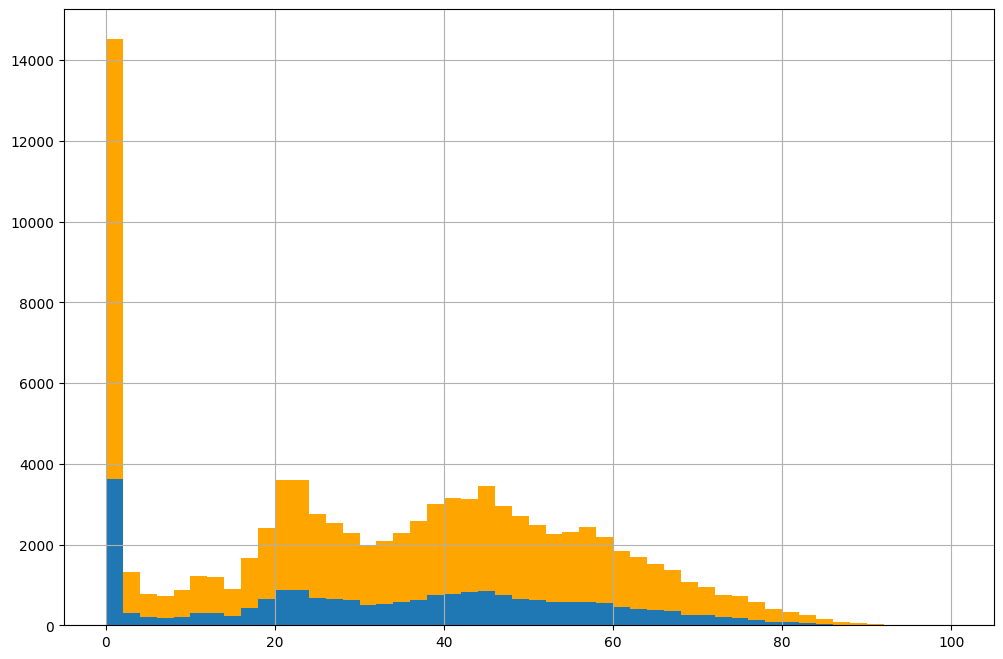

In [135]:
#distribución del target de regresión
train_set['popularity'].hist(bins=50, figsize=(12, 8), color="orange");
test_set['popularity'].hist(bins=50, figsize=(12, 8));


In [136]:
train_set['track_genre'].value_counts(dropna = False, normalize = True)

track_genre
punk              0.009057
blues             0.009046
j-pop             0.009035
metal             0.009035
kids              0.009035
                    ...   
swedish           0.008531
honky-tonk        0.008509
mpb               0.008487
salsa             0.008465
minimal-techno    0.008301
Name: proportion, Length: 114, dtype: float64

In [137]:
test_set['track_genre'].value_counts(dropna = False, normalize = True)

track_genre
minimal-techno    0.010658
salsa             0.010000
mpb               0.009912
honky-tonk        0.009825
swedish           0.009737
                    ...   
j-pop             0.007719
metal             0.007719
kids              0.007719
blues             0.007675
punk              0.007632
Name: proportion, Length: 114, dtype: float64

In [138]:
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["track_genre"], random_state=1312)

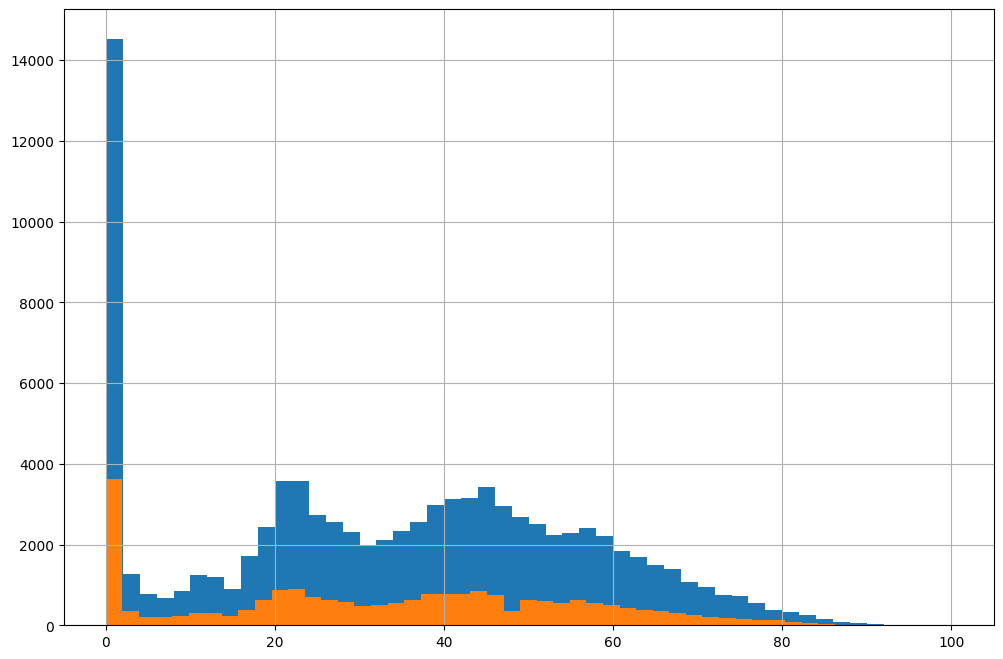

In [139]:
plt.xlabel = "median_house_value"
strat_train_set['popularity'].hist(bins=50, figsize=(12, 8))
strat_test_set['popularity'].hist(bins=50, figsize=(12, 8));

In [140]:
from sklearn.model_selection import KFold, cross_val_score

In [141]:
#track_genre OneHotEncoder y sustituir la original. Usar parametro prefix 'genre'

cat_encoder = OneHotEncoder(sparse_output=False)

encoded_genres = cat_encoder.fit_transform(df[['track_genre']])



In [142]:
len(encoded_genres)

113999

In [143]:
df_track_genre = pd.DataFrame(encoded_genres, columns= cat_encoder.get_feature_names_out(['track_genre']))

In [144]:
df_track_genre

,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [145]:
df_final = pd.concat([df, df_track_genre], axis=1)

In [146]:
df_final

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73.0,230666.0,0.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,149610.0,0.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57.0,210826.0,0.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.0,201933.0,0.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,198853.0,0.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113996,22.0,385000.0,0.0,0.174,0.1170,0.0,-18.318,0.0,0.0401,0.9940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,22.0,271466.0,0.0,0.629,0.3290,0.0,-10.895,0.0,0.0420,0.8670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113998,41.0,283893.0,0.0,0.587,0.5060,7.0,-10.889,1.0,0.0297,0.3810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113999,22.0,241826.0,0.0,0.526,0.4870,1.0,-10.204,0.0,0.0725,0.6810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_final.dropna(inplace=True)                   #esto elimina dos datos, lo que me hace pensar que no están ordenados

In [148]:
cat_encoder.categories_

[array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
        'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
        'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
        'chill', 'classical', 'club', 'comedy', 'country', 'dance',
        'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
        'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
        'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
        'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
        'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
        'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
        'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
        'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
        'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
        'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film

In [149]:
df_final.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Index: 113998 entries, 0 to 113998
Data columns (total 130 columns):
 #    Column                         Non-Null Count   Dtype  
---   ------                         --------------   -----  
 0    popularity                     113998 non-null  float64
 1    duration_ms                    113998 non-null  float64
 2    explicit                       113998 non-null  float64
 3    danceability                   113998 non-null  float64
 4    energy                         113998 non-null  float64
 5    key                            113998 non-null  float64
 6    loudness                       113998 non-null  float64
 7    mode                           113998 non-null  float64
 8    speechiness                    113998 non-null  float64
 9    acousticness                   113998 non-null  float64
 10   instrumentalness               113998 non-null  float64
 11   liveness                       113998 non-null  float64
 12   valence            

In [150]:
df_final = df_final.drop(columns=['track_genre'])

In [151]:
df_final

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73.0,230666.0,0.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,149610.0,0.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57.0,210826.0,0.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.0,201933.0,0.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,198853.0,0.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22.0,305454.0,0.0,0.331,0.1710,1.0,-15.668,1.0,0.0350,0.9200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,21.0,384999.0,0.0,0.172,0.2350,5.0,-16.393,1.0,0.0422,0.6400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,22.0,385000.0,0.0,0.174,0.1170,0.0,-18.318,0.0,0.0401,0.9940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,22.0,271466.0,0.0,0.629,0.3290,0.0,-10.895,0.0,0.0420,0.8670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [156]:
df_final.shape

(113998, 129)

In [152]:
ss

NameError: name 'ss' is not defined

# Feature engineering

In [ ]:
corr_matrix = df_final.select_dtypes(include=[np.number]).corr()

In [ ]:
corr_matrix['popularity'].sort_values(ascending=False)

popularity                    1.000000
track_genre_pop-film          0.109729
track_genre_k-pop             0.099974
track_genre_chill             0.086090
track_genre_sad               0.080544
                                ...   
track_genre_detroit-techno   -0.093061
instrumentalness             -0.095149
track_genre_latin            -0.105157
track_genre_romance          -0.126409
track_genre_iranian          -0.130867
Name: popularity, Length: 129, dtype: float64

In [ ]:
df_final


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73.0,230666.0,0.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,149610.0,0.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57.0,210826.0,0.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.0,201933.0,0.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,198853.0,0.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22.0,305454.0,0.0,0.331,0.1710,1.0,-15.668,1.0,0.0350,0.9200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,21.0,384999.0,0.0,0.172,0.2350,5.0,-16.393,1.0,0.0422,0.6400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,22.0,385000.0,0.0,0.174,0.1170,0.0,-18.318,0.0,0.0401,0.9940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,22.0,271466.0,0.0,0.629,0.3290,0.0,-10.895,0.0,0.0420,0.8670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_final.to_csv('C:/Users/Á/Desktop/TB_24_ML/Pruebaspropias/MachineLearning/df_final_num.csv', index=False)


NameError: name 'ss' is not defined

In [ ]:
X = df_final


In [ ]:
X

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73.0,230666.0,0.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,149610.0,0.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57.0,210826.0,0.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.0,201933.0,0.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,198853.0,0.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22.0,305454.0,0.0,0.331,0.1710,1.0,-15.668,1.0,0.0350,0.9200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,21.0,384999.0,0.0,0.172,0.2350,5.0,-16.393,1.0,0.0422,0.6400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,22.0,385000.0,0.0,0.174,0.1170,0.0,-18.318,0.0,0.0401,0.9940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,22.0,271466.0,0.0,0.629,0.3290,0.0,-10.895,0.0,0.0420,0.8670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y = df_final['popularity'].copy()

In [ ]:
y

0         73.0
1         55.0
2         57.0
3         71.0
4         82.0
          ... 
113994    22.0
113995    21.0
113996    22.0
113997    22.0
113998    41.0
Name: popularity, Length: 113998, dtype: float64

In [ ]:
X = df_final.drop(columns=['popularity'])

In [ ]:
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666.0,0.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149610.0,0.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,210826.0,0.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201933.0,0.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,198853.0,0.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,305454.0,0.0,0.331,0.1710,1.0,-15.668,1.0,0.0350,0.9200,0.022900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,384999.0,0.0,0.172,0.2350,5.0,-16.393,1.0,0.0422,0.6400,0.928000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,385000.0,0.0,0.174,0.1170,0.0,-18.318,0.0,0.0401,0.9940,0.976000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,271466.0,0.0,0.629,0.3290,0.0,-10.895,0.0,0.0420,0.8670,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('estandarización', StandardScaler())])

In [ ]:
num_pipeline
df_final_est = pd.DataFrame(num_pipeline.fit_transform(df_final), columns=df_final.columns)

In [ ]:
df_final_est.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=129)

In [ ]:
X = df_final_est.drop(columns=['popularity'], errors='ignore').copy()
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,0.024558,-0.30577,0.629234,-0.717150,-1.210447,0.300820,-1.326313,0.551840,-0.850184,-0.504114,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
1,-0.730885,-0.30577,-0.845907,-1.889974,-1.210447,-1.784736,0.753970,-0.078996,1.831756,-0.504099,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
2,-0.160351,-0.30577,-0.742186,-1.122669,-1.491348,-0.293292,0.753970,-0.273826,-0.315480,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
3,-0.243234,-0.30577,-1.733296,-2.312986,-1.491348,-2.039241,0.753970,-0.457308,1.774617,-0.503889,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
4,-0.271939,-0.30577,0.295022,-0.788713,-0.929546,-0.282753,0.753970,-0.303146,0.463419,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113993,0.721583,-0.30577,-1.358749,-1.870096,-1.210447,-1.473165,0.753970,-0.469603,1.819727,-0.430140,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052
113994,1.462943,-0.30577,-2.274949,-1.615653,-0.086844,-1.617318,0.753970,-0.401507,0.977673,2.493729,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052
113995,1.462952,-0.30577,-2.263425,-2.084782,-1.491348,-2.000071,-1.326313,-0.421368,2.042269,2.648790,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052
113996,0.404814,-0.30577,0.358407,-1.241939,-1.491348,-0.524136,-1.326313,-0.403398,1.660338,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052


In [ ]:
X.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=128)

In [ ]:
y

0         73.0
1         55.0
2         57.0
3         71.0
4         82.0
          ... 
113994    22.0
113995    21.0
113996    22.0
113997    22.0
113998    41.0
Name: popularity, Length: 113998, dtype: float64

In [ ]:
lista_col = df_final_est.columns.tolist()

print(lista_col)

['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 

In [ ]:
df_final_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113998 entries, 0 to 113997
Columns: 129 entries, popularity to track_genre_world-music
dtypes: float64(129)
memory usage: 112.2 MB


In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 
'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
'time_signature', 'track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 
'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 
'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 
'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 
'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 
'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 
'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 
'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 
'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_garage',
'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'track_genre_grindcore', 'track_genre_groove', 
'track_genre_grunge', 'track_genre_guitar', 'track_genre_happy', 'track_genre_hard-rock', 'track_genre_hardcore', 
'track_genre_hardstyle', 'track_genre_heavy-metal', 'track_genre_hip-hop', 'track_genre_honky-tonk', 'track_genre_house', 
'track_genre_idm', 'track_genre_indian', 'track_genre_indie', 'track_genre_indie-pop', 'track_genre_industrial', 'track_genre_iranian', 
'track_genre_j-dance', 'track_genre_j-idol', 'track_genre_j-pop', 'track_genre_j-rock', 'track_genre_jazz', 'track_genre_k-pop', 'track_genre_kids', 
'track_genre_latin', 'track_genre_latino', 'track_genre_malay', 'track_genre_mandopop', 'track_genre_metal', 'track_genre_metalcore', 'track_genre_minimal-techno', 
'track_genre_mpb', 'track_genre_new-age', 'track_genre_opera', 'track_genre_pagode', 'track_genre_party', 'track_genre_piano', 'track_genre_pop', 'track_genre_pop-film', 
'track_genre_power-pop', 'track_genre_progressive-house', 'track_genre_psych-rock', 'track_genre_punk', 'track_genre_punk-rock', 'track_genre_r-n-b', 'track_genre_reggae', 
'track_genre_reggaeton', 'track_genre_rock', 'track_genre_rock-n-roll', 'track_genre_rockabilly', 'track_genre_romance', 'track_genre_sad', 'track_genre_salsa', 'track_genre_samba', 
'track_genre_sertanejo', 'track_genre_show-tunes', 'track_genre_singer-songwriter', 'track_genre_ska', 'track_genre_sleep', 'track_genre_songwriter', 'track_genre_soul', 'track_genre_spanish', 
'track_genre_study', 'track_genre_swedish', 'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno', 'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish', 'track_genre_world-music']

cat_attribs = []

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse_output=False))

preprocesado = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
preprocesado.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('estandarización',
                                                  StandardScaler())]),
                                 ['duration_ms', 'explicit', 'danceability',
                                  'energy', 'key', 'loudness', 'mode',
                                  'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'time_signature',
                                  'track_genre_acoustic',
                                  'track_genre_afrobeat',
                                  'track_genre_alt-rock',
                                  'track_genre_altern...
                                  'track_genre_ambient', 'track_genre_anime',
                                  'track_genre_black-metal',
                                  'track_genre_bluegr

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# PREDICCIÓN DE POPULARIDAD

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1312)


In [ ]:
y_train

28554     40.0
16226      0.0
113088    58.0
94541     47.0
58021      0.0
          ... 
64521      0.0
42229     16.0
111307    49.0
21267     65.0
22354     48.0
Name: popularity, Length: 91198, dtype: float64

In [ ]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
28554,0.042723,-0.30577,-0.304254,-0.657515,0.474957,0.055660,0.753970,-0.461091,-0.095945,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
16226,0.401217,-0.30577,-1.600764,-1.997317,-0.648646,-2.584242,-1.326313,-0.464874,2.033247,2.477577,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
113087,-0.553031,-0.30577,0.577373,0.908900,1.036759,0.981822,0.753970,-0.062917,0.228847,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052
94540,-0.925719,-0.30577,1.072929,-0.136702,-1.491348,0.405009,-1.326313,-0.493247,0.307038,-0.504104,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
58021,0.337710,-0.30577,0.168252,1.282613,-0.929546,0.498063,0.753970,-0.040219,-0.946734,2.190068,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64521,-0.032853,-0.30577,0.145203,-0.399097,0.474957,-0.088295,0.753970,-0.296525,1.022783,-0.499045,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
42229,-1.292918,-0.30577,-2.355621,1.413811,-1.210447,0.985401,0.753970,0.495093,-0.944446,2.083464,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
111306,0.919409,-0.30577,-0.102574,0.789630,0.474957,-0.134424,0.753970,-0.429880,-0.912436,1.921942,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052,-0.094073,-0.094073
21267,-0.306601,-0.30577,-0.073763,-0.526318,-1.210447,-0.232648,0.753970,2.405569,-0.498927,-0.504057,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073


In [ ]:
lin_reg = make_pipeline(preprocesado, LinearRegression()) #modelo instanciado(con paréntesis)


In [ ]:
lin_reg.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('estandarización',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'explicit',
                                                   'danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'time_signature',
                                                   'track_genre_acoustic',
                                                   'track_genre_afrobeat',
                                                   'trac...
                                                   'track_genre_bluegrass',
                                                   'track_genre_blues',
                                                   'track_genre_brazil',
                                                   'track_genre_breakbeat',
                                                   'track_genre_british',
                                                   'track_genre_cantopop',
                                                   'track_genre_chicago-house',
                                                   'track_genre_children',
                                                   'track_genre_chill', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('linearregression', LinearRegression())])

In [ ]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
28554,0.042723,-0.30577,-0.304254,-0.657515,0.474957,0.055660,0.753970,-0.461091,-0.095945,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
16226,0.401217,-0.30577,-1.600764,-1.997317,-0.648646,-2.584242,-1.326313,-0.464874,2.033247,2.477577,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
113087,-0.553031,-0.30577,0.577373,0.908900,1.036759,0.981822,0.753970,-0.062917,0.228847,-0.504117,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052
94540,-0.925719,-0.30577,1.072929,-0.136702,-1.491348,0.405009,-1.326313,-0.493247,0.307038,-0.504104,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
58021,0.337710,-0.30577,0.168252,1.282613,-0.929546,0.498063,0.753970,-0.040219,-0.946734,2.190068,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64521,-0.032853,-0.30577,0.145203,-0.399097,0.474957,-0.088295,0.753970,-0.296525,1.022783,-0.499045,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
42229,-1.292918,-0.30577,-2.355621,1.413811,-1.210447,0.985401,0.753970,0.495093,-0.944446,2.083464,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
111306,0.919409,-0.30577,-0.102574,0.789630,0.474957,-0.134424,0.753970,-0.429880,-0.912436,1.921942,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630052,-0.094073,-0.094073
21267,-0.306601,-0.30577,-0.073763,-0.526318,-1.210447,-0.232648,0.753970,2.405569,-0.498927,-0.504057,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073


In [ ]:
preds = lin_reg.predict(X_test)

In [ ]:
preds

array([12.4800469 , 20.87506643, 45.84647146, ..., 23.14606253,
       35.10059134, 26.74048392])

In [ ]:
lin_rmse = mean_squared_error(y_test, preds)
lin_rmse

359.4739627128686

In [ ]:
lin_reg[1].coef_

array([ 5.61474446e-02,  7.82656811e-01,  1.08069784e+00, -1.02465943e+00,
       -1.39546120e-01,  6.42575267e-01, -5.06092606e-01, -4.09980412e-01,
       -5.65772176e-01, -3.30099115e-01, -2.45353958e-01, -1.37548224e+00,
        2.40328091e-01,  3.01083003e-01,  3.84417991e+11,  3.90445016e+11,
        3.92591283e+11,  3.89247345e+11,  3.89247345e+11,  3.91638892e+11,
        3.87805079e+11,  3.88286451e+11,  3.94252228e+11,  3.89247345e+11,
        3.88526905e+11,  3.91161795e+11,  3.88767205e+11,  3.84903751e+11,
        3.85873371e+11,  3.87564161e+11,  3.86357236e+11,  3.86357236e+11,
        3.89726871e+11,  3.84417991e+11,  3.86115382e+11,  3.90205787e+11,
        3.83200803e+11,  3.89487184e+11,  3.88526905e+11,  3.87081859e+11,
        3.83444561e+11,  3.89247345e+11,  3.89007352e+11,  3.90445016e+11,
        3.91638892e+11,  3.85388876e+11,  3.86840474e+11,  3.84660950e+11,
        3.86840474e+11,  3.83444561e+11,  3.90923020e+11,  3.88286451e+11,
        3.91400419e+11,  

In [ ]:
list_models_names = ["Regresor Lineal","Arbol de Decision","Random Forest", "XGBoostReg", "Light GBM"]
list_models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor,  ]

modelos = {model_name:make_pipeline(preprocesado,model()) for model_name,model in \
                 zip(list_models_names, list_models)}


In [ ]:
modelos

{'Regresor Lineal': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('estandarización',
                                                                    StandardScaler())]),
                                                   ['duration_ms', 'explicit',
                                                    'danceability', 'energy',
                                                    'key', 'loudness', 'mode',
                                                    'speechiness',
                                                    'acousticness',
                                                    'instrumentalness',
                                                    'liveness', 'valence',
                                                    'tempo', 'time_signature',
                                                    'track_genre_acoustic',
                                   

In [ ]:
import time as tm
t_zero = tm.time()
tm.time() - t_zero

0.0

In [ ]:
import lightgbm as lgb 

In [ ]:
"""import pickle

pickle.dump(modelo, open('model.sav', 'wb'))

nuevo_modelo = pickle.load(open('model.sav', 'rb'))"""


"import pickle\n\npickle.dump(modelo, open('model.sav', 'wb'))\n\nnuevo_modelo = pickle.load(open('model.sav', 'rb'))"

In [ ]:

results = {}
best_name = "None"
best = None
for model_name,modelo in modelos.items():
    t_zero = tm.time()
    modelo.fit(X_train,y_train)
    preds = modelo.predict(X_train)
    results[model_name] = mean_squared_error(y_train, preds)
    best = results[model_name] if best == None else best
    best_name = model_name if results[model_name] < best else best_name
    best = results[model_name] if results[model_name] < best else best
    print("Modelo <{}> -> RSME: {}, training_time: {}".format(model_name, results[model_name], tm.time() - t_zero))
print("Best: ",best_name)

Modelo <Regresor Lineal> -> RSME: 370.69153776809753, training_time: 1.1264278888702393
Modelo <Arbol de Decision> -> RSME: 16.080886540544288, training_time: 5.469377279281616
Modelo <Random Forest> -> RSME: 45.07707195724439, training_time: 334.9687530994415
Modelo <XGBoostReg> -> RSME: 280.02754889655216, training_time: 0.921337366104126
Best:  Arbol de Decision


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score


In [ ]:
resultados = {}
for model_name, model in modelos.items():
    t_zero = tm.time()
    model_rmses = -cross_val_score(model, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
    resultados[model_name] = pd.Series(model_rmses).mean()
    print(model_name)
    print(pd.Series(model_rmses).describe())
    print("Validation time: ", tm.time() - t_zero)
    print("#######\n")

Regresor Lineal
count    10.000000
mean     19.282683
std       0.153524
min      19.042105
25%      19.163160
50%      19.327349
75%      19.410506
max      19.458241
dtype: float64
Validation time:  9.599857330322266
#######

Arbol de Decision
count    10.000000
mean     21.441362
std       0.328583
min      21.019310
25%      21.293842
50%      21.397766
75%      21.466718
max      22.231060
dtype: float64
Validation time:  47.11628985404968
#######



KeyboardInterrupt: 

In [ ]:
grid_random_forest = {"randomforestregressor__n_estimators": [100,120], # El Random Forest no suele empeorar por exceso de
                                             # estimadores. A partir de cierto numero no merece la pena
                                             # perder el tiempo ya que no mejora mucho más la precisión.
                                             # Entre 100 y 200 es una buena cifra

                     
                     "randomforestregressor__max_depth": [3,4,5], # No le afecta tanto el overfitting como al decissiontree.
                                                      # Podemos probar mayores profundidades
                      
                     "randomforestregressor__max_features": [3, 4, 6] # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.
                                                      #se pude poner sqrt del nº de features
                                                    
                     }

In [ ]:
rgs_model = modelos["Random Forest"] #recuperando los modelos dentro del dict que hicimos dentro del pipeline


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search_rgs = GridSearchCV(rgs_model, grid_random_forest, cv=5,
                           scoring='neg_root_mean_squared_error')

In [ ]:
time grid_search_rgs.fit(X_train, y_train)

CPU times: total: 2min 7s
Wall time: 2min 12s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('estandarización',
                                                                                          StandardScaler())]),
                                                                         ['duration_ms',
                                                                          'explicit',
                                                                          'danceability',
                                                                          'energy',
                                                                          'key',
                                                                          'loudness',
                                                                          'mode',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                                          'liveness',
                                                                          'valence',
                                                                          'tempo',
                                                                          'time_signature',
                                                                          'track_genre_acoustic',...
                                                                          'track_genre_chill', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [3, 4, 5],
                         'randomforestregressor__max_features': [3, 4, 6],
                         'randomforestregressor__n_estimators': [100, 120]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search_rgs.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': 6,
 'randomforestregressor__n_estimators': 120}

In [ ]:
best_rgs = grid_search_rgs.best_estimator_

In [ ]:
final_predictions = best_rgs.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions)
print(final_rmse)

459.64889465801906
